##Muhamad Fahrurrozi
Proyek Akhir : Klasifikasi Gambar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
from sklearn.model_selection import train_test_split

# Tentukan path dataset
zip_file_path = '/content/drive/My Drive/Project-Image/rockpaperscissors.zip'
extract_folder = '/content/drive/My Drive/Project-Image/dataset'  # Folder tempat mengekstrak dataset

# Ekstrak zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List nama folder di dalam dataset
base_dir = os.path.join(extract_folder, 'rockpaperscissors')

# Nama subfolder kategori
categories = ['rock', 'paper', 'scissors']

# Bagi data menjadi train dan validation
train_data = []
validation_data = []

for category in categories:
    category_path = os.path.join(base_dir, category)
    images = [img for img in os.listdir(category_path) if img.endswith('.png')]

    # Bagi data menjadi train dan validation
    if len(images) > 1:  # Pastikan ada setidaknya dua sampel
        train_images, validation_images = train_test_split(images, test_size=0.4, random_state=42)
        train_data.extend(train_images)
        validation_data.extend(validation_images)
    else:
        print(f"Kategori '{category}' tidak memiliki cukup sampel untuk dibagi. (Total sampel: {len(images)})")

# Cetak jumlah data train dan validation
print(f"Jumlah Data Train: {len(train_data)}")
print(f"Jumlah Data Validation: {len(validation_data)}")


Jumlah Data Train: 1288
Jumlah Data Validation: 861


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Inisialisasi image data generator untuk augmentasi gambar pada data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generator untuk data validation (tanpa augmentasi)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan flow_from_directory untuk memuat data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Membangun model sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: gunting, batu, kertas
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model menggunakan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Found 2215 images belonging to 3 classes.
Found 2215 images belonging to 3 classes.
Epoch 1/20
69/69 [==============================] - 189s 3s/step - loss: 1.1791 - accuracy: 0.4118 - val_loss: 0.9743 - val_accuracy: 0.6499
Epoch 2/20
69/69 [==============================] - 192s 3s/step - loss: 0.7237 - accuracy: 0.6963 - val_loss: 0.2762 - val_accuracy: 0.9162
Epoch 3/20
69/69 [==============================] - 194s 3s/step - loss: 0.5043 - accuracy: 0.7893 - val_loss: 0.3127 - val_accuracy: 0.8800
Epoch 4/20
69/69 [==============================] - 230s 3s/step - loss: 0.4260 - accuracy: 0.8342 - val_loss: 0.1695 - val_accuracy: 0.9547
Epoch 5/20
69/69 [==============================] - 187s 3s/step - loss: 0.3346 - accuracy: 0.8786 - val_loss: 0.1944 - val_accuracy: 0.9289
Epoch 6/20
69/69 [==============================] - 189s 3s/step - loss: 0.3269 - accuracy: 0.8791 - val_loss: 0.1353 - val_accuracy: 0.9633
Epoch 7/20
69/69 [==============================] - 190s 3s/step - los

In [ ]:
model.save('/content/drive/My Drive/Project-Image/image-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileUpload(value={}, description='Upload')

Image Dimensions: (150, 150)
1/1 [==============================] - 0s 148ms/step
Prediction: [[1.9200976e-03 9.9807870e-01 1.1780512e-06]]


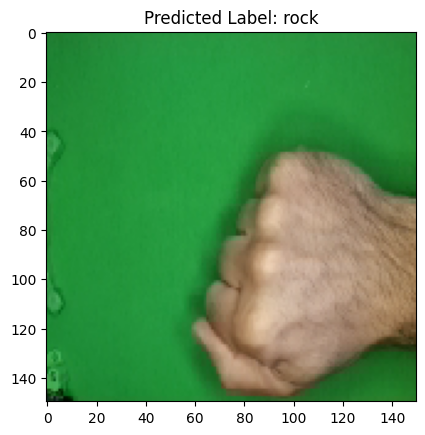

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display
import ipywidgets as widgets
from io import BytesIO
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/drive/My Drive/Project-Image/image-model.h5')

upload = widgets.FileUpload()
display(upload)

def on_upload_change(change):

    uploaded_image = upload.value[next(iter(upload.value))]
    img = image.load_img(BytesIO(uploaded_image['content']), target_size=(150, 150))

    print('Image Dimensions:', img.size)

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    print('Prediction:', prediction)

    class_labels = ['scissors', 'rock', 'paper']
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.imshow(img)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()

upload.observe(on_upload_change, names='_counter')